# Create CartPole environment

In [1]:
# Import the gym Library
import gym

# Create the environment using gym.make(env_name)
env = gym.make('CartPole-v1')

"""
Analyze the action space of cart pole using the property action_space
"""
print("Action Space:", env.action_space)

"""
Analyze the observation space of cartpole using the property observation_space
"""
print("Observation Space:", env.observation_space)

Action Space: Discrete(2)
Observation Space: Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)


The two discrete actions are Go Left (0) and Go Right (1).<br> The (4,) means that it is a 4 dimensional box, subset of $\mathbb{R}^n$.<br> The forms of each interval in the Box space can be one of $[a,b],(-\infty,b],[a,+\infty),(-\infty,+\infty)$.
> **Note:**<br> The square brackets indicate bounded values, and the parenthsis indicate unbounded values.
## Inspect the observation space

In [2]:
# Analyze the bounds of the observation space
print("Lower bound of the Observation Space:", env.observation_space.low)
print("Upper bound of the Observation Space:", env.observation_space.high)

Lower bound of the Observation Space: [-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
Upper bound of the Observation Space: [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


From left to right, these represent the cart position, velocity, pole angle in rads, and angular velocity.

## GYM SPACES
Create a simple space and sample it:

In [3]:
# Type hinting
from typing import Tuple
#import gym 

# Import the spaces module
from gym import spaces

# Create a discrete space composed by N-elements (5)
n: int = 5
    
discrete_space = spaces.Discrete(n=n)

# Sample from the space using .sample method
print("Discrete Space Sample:", discrete_space.sample())

"""
Create a Box space with a shape of (4, 4)
Upper and lower Bound are 0 and 1
"""

box_shape: Tuple[int, int] = (4, 4)
box_space = spaces.Box(low=0, high=1, shape=box_shape)

# Sample from the space using .sample method
print("Box Space Sample:", box_space.sample())

Discrete Space Sample: 1
Box Space Sample: [[0.5829716  0.15603957 0.5295939  0.01839788]
 [0.01533006 0.4879383  0.9396693  0.16973497]
 [0.8210014  0.7067042  0.00655037 0.22056876]
 [0.5887672  0.9479979  0.5391429  0.04435645]]


This is a random sample of the $4^{th}$ element from the discrete space composed of 5 elements (0 to 4). The result is a 4x4 matrix bounded between 0 and 1.

The sample can be seeded for reproducibility.

In [4]:
# Seed spaces to obtain reproducible samples
discrete_space.seed(0)
box_space.seed(0)

# Sample from the space using .sample method
print("Discrete Space (seed=0) Sample:", discrete_space.sample())

# Sample from the space using .sample method
print("Box Space (seed=0) Sample:", box_space.sample())

Discrete Space (seed=0) Sample: 0
Box Space (seed=0) Sample: [[0.05436005 0.9653909  0.63269097 0.29001734]
 [0.10248426 0.67307633 0.39257675 0.66984606]
 [0.05983897 0.52698725 0.04029069 0.9779441 ]
 [0.46293673 0.6296479  0.9470484  0.6992778 ]]


### Creating A Space For Image Observations
Create a space representing RGB images with dimensions equal to 256 x 256.

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np # used for the dtype of the space

"""
since the Space is RGB images with shape 256x256 the final shape is (256, 256, 3)
"""
shape = (256, 256, 3)

# If we consider uint8 images the bounds are 0-255
low = 0
high = 255

# Space type: unsigned int
dtype = np.uint8

# Create the space
space = spaces.Box(low=low, high=high, shape=shape, dtype=dtype)

# Print space representation
print("Space", space) # prints WxHxC

# Sample from the space
sample = space.sample()
print("Space Sample", sample)

Space Box(0, 255, (256, 256, 3), uint8)
Space Sample [[[183 174 117]
  [120  46 241]
  [ 27 171  71]
  ...
  [190  56 141]
  [241 242 191]
  [116 143  26]]

 [[ 77  31 124]
  [186 130  17]
  [186 226  92]
  ...
  [160 153 109]
  [241 103 182]
  [125  85 145]]

 [[135 106 144]
  [171  30  63]
  [229 201 128]
  ...
  [ 14  57  20]
  [188 160  48]
  [226   9 206]]

 ...

 [[ 81 184  99]
  [183 205  31]
  [139 255 238]
  ...
  [ 81  15  54]
  [152 242 113]
  [151 207 155]]

 [[ 84  15 118]
  [140  59 198]
  [236 127 119]
  ...
  [  4 177 194]
  [ 67  18 125]
  [ 80  16  79]]

 [[229 179 166]
  [126 156  91]
  [ 21 145 172]
  ...
  [ 62 153 117]
  [241 165 138]
  [ 37 238   7]]]


#### Visualize the retruned sample

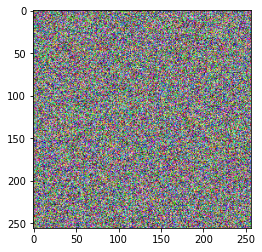

In [6]:
plt.imshow(sample)

### Add temporal component
Allow the agent to see the last **n** frames. This leads to a state representation of 4 dimensions. TxWxHxC is the result.

In [7]:
# We want a space representint the last n=4 frames
n_frames = 4 # number of frames
width = 256 # image width
height = 256 # image height
channels = 3 # number of channels (RGB)
shape_temporal = (n_frames, width, height, channels)
# create a new instance of space
space_temporal = spaces.Box(low=low, high=high, shape=shape_temporal, dtype=dtype)

print("Space with temporal component", space_temporal)

Space with temporal component Box(0, 255, (4, 256, 256, 3), uint8)


## Render The Environment

In [8]:
import time
env = gym.make("CartPole-v1")

# Reset the envirenment (mandatory)
env.reset()

# render the environment for 100 steps
n_steps = 1000
for i in range(n_steps):
    env.render()    
    action = env.action_space.sample()
    obs, rew, done, info = env.step(action)
# Had to change things up some. Need to reset the environment if "done". https://github.com/openai/gym/issues/1116
    if done:
        env.reset()
        time.sleep(0.1)
    
# Close the environment correctly
env.close()

### Implementing The Reinforcement Learning Loop with GYM

In [16]:
# each episode is composed by 200 timesteps
# define 10 episodes
n_episodes = 10
n_timesteps = 100
timestep_count = []

# loop for the episodes
for episode_number in range(n_episodes):
    # here we are inside an episode
    """
    the reset function resets the environment and returns
    the first environment observation
    """
    observation = env.reset()
    
    """
    loop for the given number of timesteps or
    until the episode is teminated
    """
    for timestep_number in range(n_timesteps):
        # render the environment
        env.render(mode="rgb-array")
        
        # select the action
        action = env.action_space.sample()
        
        # apply the selected action by calling env.step
        observaton, reward, done, info = env.step(action)
        
        """
        if done the episode is terminated, we have to reset
        the environment
        """
        if done:
            timestep_count.append(timestep_number)
            print(f"Episode Number: {episode_number}, Timesteps: {timestep_number}")
            # break from the teim3step loop
            break
            
    # close the environment
    env.close()

print(f"\nThe average timesteps per Episode is: {np.array(timestep_count).mean()}")

Episode Number: 0, Timesteps: 19
Episode Number: 1, Timesteps: 26
Episode Number: 2, Timesteps: 63
Episode Number: 3, Timesteps: 28
Episode Number: 4, Timesteps: 34
Episode Number: 5, Timesteps: 14
Episode Number: 6, Timesteps: 15
Episode Number: 7, Timesteps: 35
Episode Number: 8, Timesteps: 17
Episode Number: 9, Timesteps: 36

The average timesteps per Episode is: 28.7


The episodes end on average after 28.7 timesteps using the random policy.

## Activity 1.01: Measuring Performance of a Random Agent
1. Define an abstract **Agent** class containing a **pi()** method to represent the policy. The method takes as input the environment state. The __init__ method takes the action state and builds the distribution.
2. Define a **ContinousAgent** derived from the abstract class that:
  * Checks that the action space is continuous.
  * Initialize a probability distribution type acccording to that defined by GYM spaces.
3. Define a **DiscreteAgent** derived from the abstract class that initializes a uniform distribution.
4. Implement the **pi()** method for both agents.
5. Deefine the main RL Loopin another file by importing the agent.
6. Instantiate the agent according to the environment.
7. Take actions according to the **pi** function of the agent.
8. Measure the performance of the agent.
  * Collect the discounted return from each episode in a list or numpy array
  * Obtain the avg and std.
  
  ### Define The Abstract Agent Class

In [ ]:
import abc

"""
Abstract class representing the agent
Init with the action space and the function pi returning the action
"""


class Agent:
    def __init__(self, action_space: gym.spaces.Space):
        """
        Constructor of the agent class.
        
        Args:
            action_space (gym.spaces.Space): environment action space
        """
        raise NotImplementedError("This class cannot be instantiated.")

    @abc.abstractmethod
    def pi(self, state: np.ndarray) -> np.ndarray:
        """
        Agent's policy.
        
        Args:
            state (np.ndarray): environment state
        
        Returns:
            The selected action
        """
        pass
    
    

### Define the Continuous Agent

In [ ]:
class ContinuousAgent(Agent):
    def __init__(self, action_space: gym.spaces.Space, seed=46):
        # setup seed
        np.random.seed(seed)
        # check the action space type
        if not isinstance(action_space, gym.spaces.Box):
            raise ValueError("This is a Continuous Agent pass as input a Box Space.")

        # initialize the distribution according to the action space type
        if (action_space.low == -np.inf) and (action_space.high == np.inf):
            # the distribution is a normal distribution
            self._pi = lambda: np.random.normal(loc=0, scale=1, size=action_space.shape)
            return
        if (action_space.low != -np.inf) and (action_space.high != np.inf):
            # the distribution is a uniform distribution
            self._pi = lambda: np.random.uniform(
                low=action_space.low, high=action_space.high, size=action_space.shape
            )
            return
        if action_space.low == -np.inf:
            # negative exponential distribution
            self._pi = (
                lambda: -np.random.exponential(size=action_space.shape)
                + action_space.high
            )
            return
        if action_space.high == np.inf:
            # exponential distribution
            self._pi = (
                lambda: np.random.exponential(size=action_space.shape)
                + action_space.low
            )
            return

    def pi(self, observation: np.ndarray) -> np.ndarray:
        """
        Policy: simply call the internal _pi().
        
        This is a random agent so the action is independent from the observation.
        For real agents the action depends on the observation.
        """
        return self._pi()

### Define the Discrete Agent

In [ ]:
class DiscreteAgent(Agent):
    def __init__(self, action_space: gym.spaces.Space, seed=46):
        # setup seed
        np.random.seed(seed)
        # check the action space type
        if not isinstance(action_space, gym.spaces.Discrete):
            raise ValueError("This is a Discrete Agent pass as input a Discrete Space.")

        # initialize the distribution according to the action space n attribute
        # the distribution is a uniform distribution
        self._pi = lambda: np.random.randint(low=0, high=action_space.n)

    def pi(self, observation: np.ndarray) -> np.ndarray:
        """
        Policy: simply call the internal _pi().
        
        This is a random agent so the action is independent from the observation.
        For real agents the action depends on the observation.
        """
        return self._pi()

### Define the make_agent function
This function takes as input an action_space and instantiates the corresponding agent based on 

In [ ]:
def make_agent(action_space: gym.spaces.Space, seed=46):
    """
    Returns the correct agent based on the action space type
    """
    if isinstance(action_space, gym.spaces.Discrete):
        return DiscreteAgent(action_space, seed)
    if isinstance(action_space, gym.spaces.Box):
        return ContinuousAgent(action_space, seed)
    raise ValueError(
        "Only Box spaces or Discrete Spaces are allowed, check the action space of the environment"
    )

In [ ]:
# Environment Name
env_name = "CartPole-v0"
# Number of episodes
episodes = 10
# Number of Timesteps of each episodes
timesteps = 100
# Discount factor
gamma = 1.0
# seed environment
seed = 46

In [ ]:
# Needed to show the environment in a notebook
from gym import wrappers

In [ ]:
env = gym.make(env_name)
env.seed(seed)
# the last argument is needed to record all episodes
# otherwise gym would record only some of them
# The monitor saves the episodes inside the folder ./gym-results
env = wrappers.Monitor(
    env, "./gym-results", force=True, video_callable=lambda episode_id: True
)

agent = make_agent(env.action_space, seed)

# list of returns
episode_returns = []

# loop for the episodes
for episode_number in range(episodes):
    # here we are inside an episode

    # reset cumulated gamma
    gamma_cum = 1

    # return of the current episode
    episode_return = 0

    # the reset function resets the environment and returns
    # the first environment observation
    observation = env.reset()

    # loop for the given number of timesteps or
    # until the episode is terminated
    for timestep_number in range(timesteps):

        # render the environment
        # env.render()

        # select the action
        action = agent.pi(observation)

        # apply the selected action by calling env.step
        observation, reward, done, info = env.step(action)

        # increment the return
        episode_return += reward * gamma_cum

        # update the value of cumulated discount factor
        gamma_cum = gamma_cum * gamma

        # if done the episode is terminated, we have to reset
        # the environment
        if done:
            print(
                f"Episode Number: {episode_number}, Timesteps: {timestep_number}, Return: {episode_return}"
            )
            # break from the timestep loop
            break

    episode_returns.append(episode_return)

# close the environment
env.close()

# Calculate return statistics
avg_return = np.mean(episode_returns)
std_return = np.std(episode_returns)
var_return = std_return ** 2  # variance is std^2

print(f"Statistics on Return: Average: {avg_return}, Variance: {var_return}")


In [ ]:
# Render the episodes
import io
import base64
from IPython.display import HTML, display

episodes_to_watch = 1
for episode in range(episodes_to_watch):
    video = io.open(
        f"./gym-results/openaigym.video.{env.file_infix}.video{episode:06d}.mp4", "r+b"
    ).read()
    encoded = base64.b64encode(video)
    display(
        HTML(
            data="""
        <video width="360" height="auto" alt="test" controls><source src="data:video/mp4;base64,{0}" type="video/mp4" /></video>""".format(
                encoded.decode("ascii")
            )
        )
    )